In [1]:
#This tutorial was edited from an original designed and prepared by Dalya Baron.

###In this tutorial, we will first learn how to use two clustering algorithms, K-means and Hierarchical Clustering, and we will then try to apply them to Gaia data###

# imports
#%pylab inline
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<ipython-input-1-4b31fda47ed0>:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. K-means algorithm
Here we will examine the performance of the K-mean algorithm on various datasets. <br>
We will use **sklearn**: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html <br>
We will apply the following tests: <br>
1.1. Different input datasets. <br>
1.2. Different hyper-parameters. <br>
**Remember: ** we are trying to break the algorithm!

## 1.1. K-means performance on different datasets
Here we will examine K-means performance on different datasets. 

Text(0, 0.5, 'y')

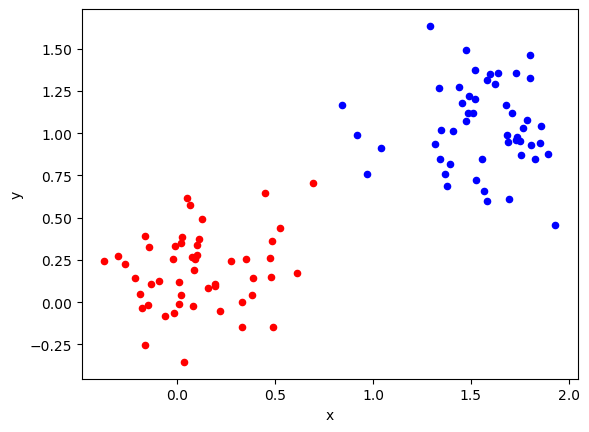

In [2]:
# start by simulating a simple dataset with 2 dimensions, where the output is expected

# we will simulate a dataset with 2 clusters, each is drawn from a 2D Gaussian distribution
size = 50
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.05, 0.01], [0.01, 0.05]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T

mean_2 = np.array([1.5, 1.0])
cov_2 = np.array([[0.07, 0.01], [0.01, 0.07]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

plt.scatter(x1, y1, c="r", s=20)
plt.scatter(x2, y2, c="b", s=20)
plt.xlabel("x")
plt.ylabel("y")

(100,) (100,) (100, 2)


Text(0, 0.5, 'y')

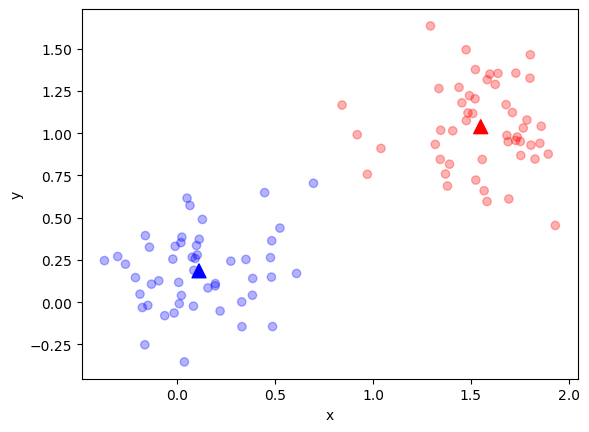

In [3]:
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
X = np.array([x, y]).T
print(x.shape, y.shape, X.shape)

# Let's execute K-means in its simplest version
# We will use two clusters, a random initialization of the centroids, and a single initialization of the centroids
kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Let's plot the result!
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.3, cmap="bwr")
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1], marker='^', s=100, cmap="bwr")
plt.xlabel("x")
plt.ylabel("y")

 ### 1.1.1. Clusters at different separations
 We will now examine how K-means performs for clusters at different separations
 We wiill simulate several datasets, and change the separation between the clusters.

Text(0, 0.5, 'y')

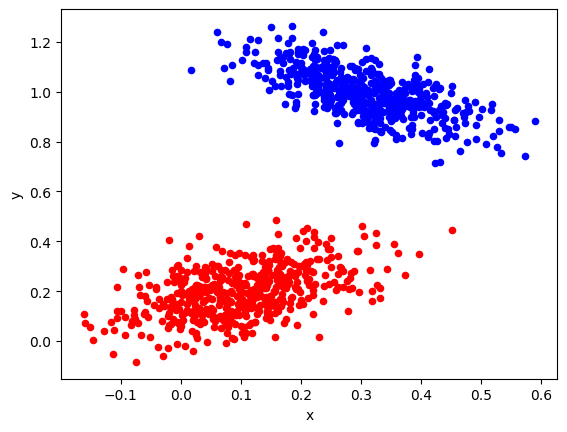

In [4]:
# we will fix one of the clusters, and very the distance of the second cluster from the first cluster

size = 500
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T

mean_2 = np.array([0.3, 1.0])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

plt.scatter(x1, y1, c="r", s=20)
plt.scatter(x2, y2, c="b", s=20)
plt.xlabel("x")
plt.ylabel("y")

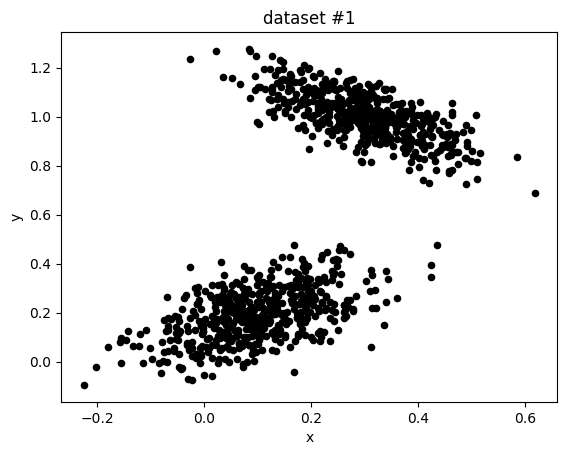

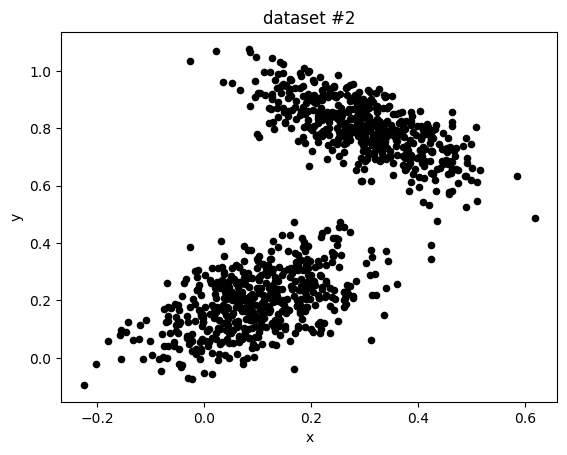

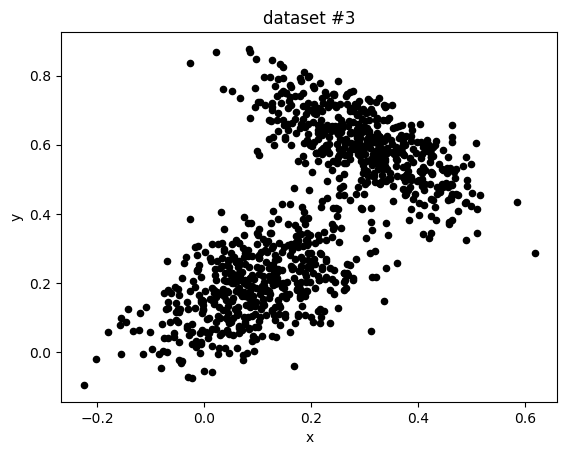

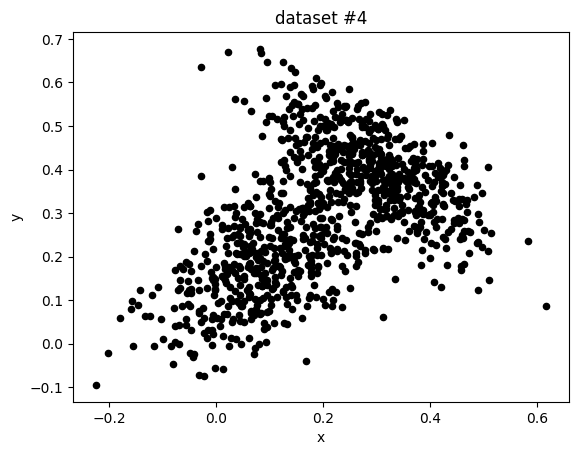

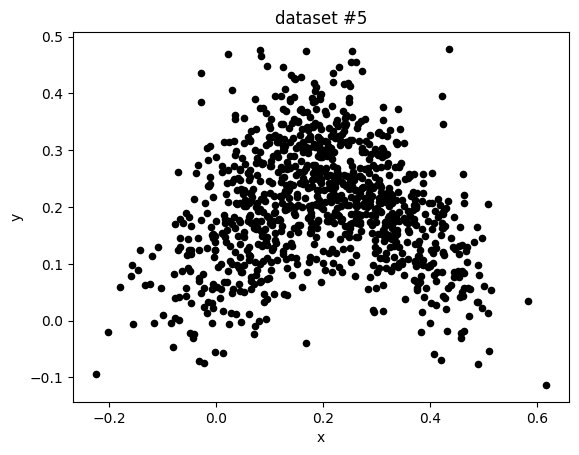

In [30]:
y_shift = 0.2 # shift per iteration

datasets = []
for i in range(5):
    y2_shifted = y2 - (y_shift * i)
    
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2_shifted))
    X = np.array([x, y]).T
    datasets.append(X)
    
    # plot the dataset
    plt.figure(i + 1)
    plt.title("dataset #%s" % (i + 1))
    plt.scatter(X[:, 0], X[:, 1], c="k", s=20)
    plt.xlabel("x")
    plt.ylabel("y")

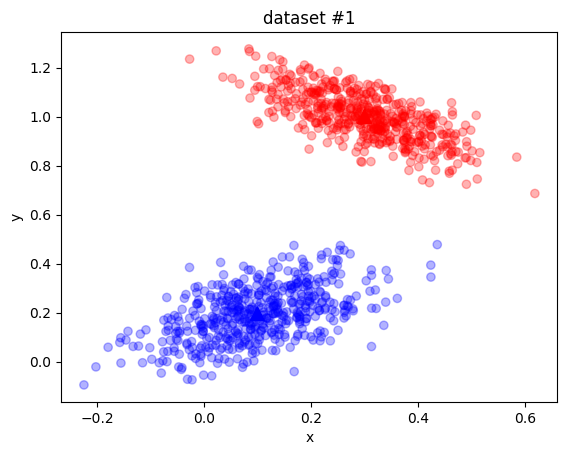

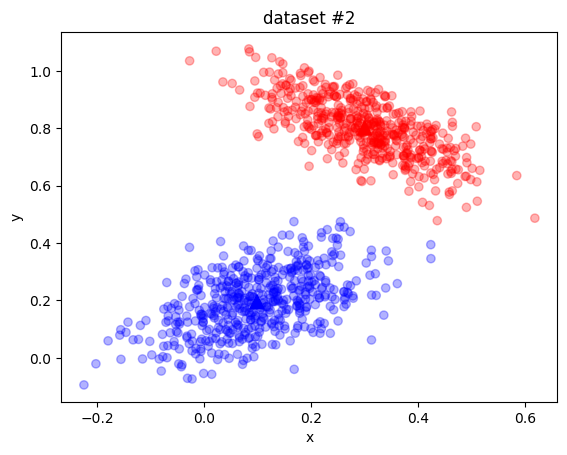

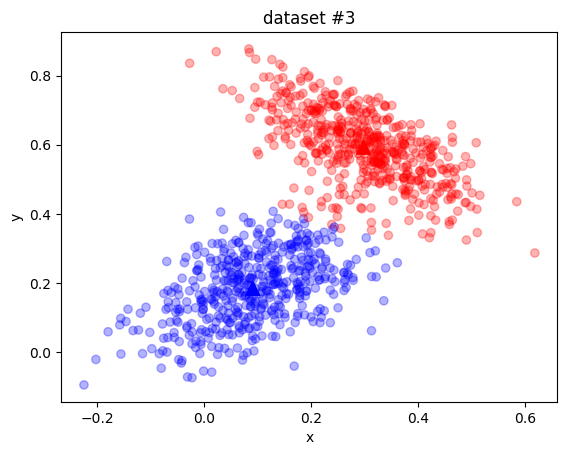

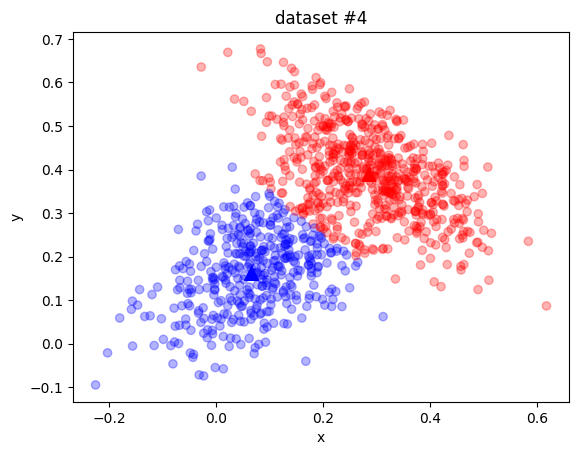

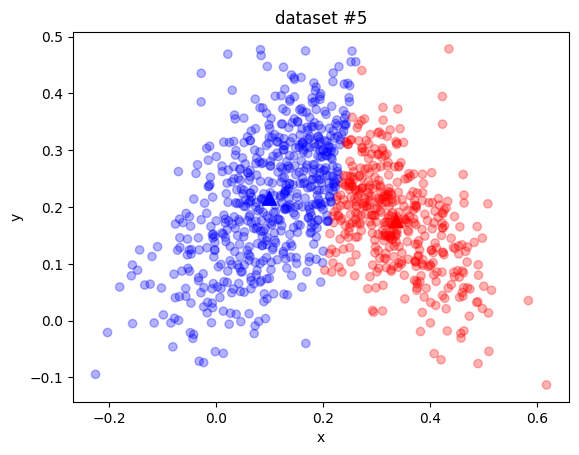

In [31]:
# now let's examine K-means performance on the different datasets!

for i, X in enumerate(datasets):
    kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=0)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_

    # Let's plot the result!
    plt.figure(i+1)
    plt.title("dataset #%s" % (i+1))
    plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.3, cmap="bwr")
    plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1], marker='^', s=100, cmap="bwr")
    plt.xlabel("x")
    plt.ylabel("y")

### 1.1.2 Outliers in the dataset
We will now examine the performance of K-means when we add outliers to the dataset.

Text(0, 0.5, 'y')

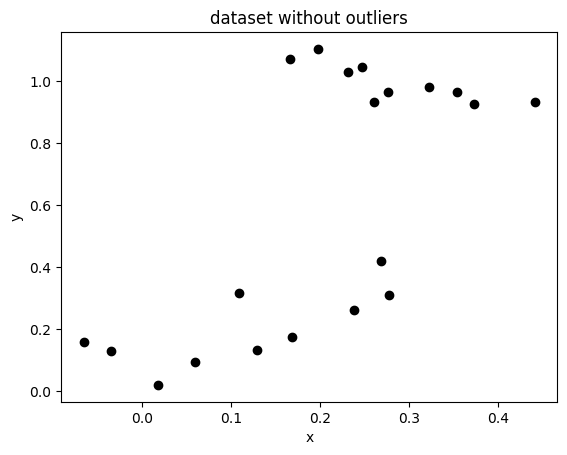

In [32]:
# we will fix the dataset, and add an outlier in each iteration.

size = 10
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T
mean_2 = np.array([0.3, 1.0])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
X = np.array([x, y]).T

plt.title("dataset without outliers")
plt.scatter(X[:, 0], X[:, 1], c="k")
plt.xlabel("x")
plt.ylabel("y")

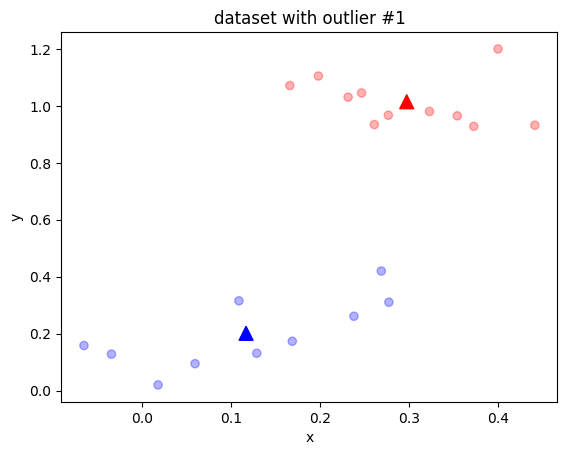

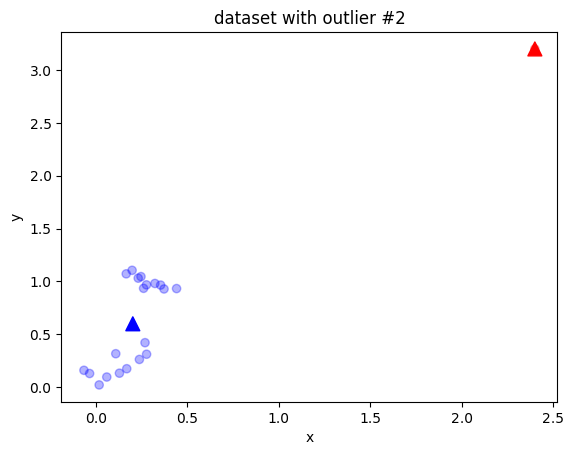

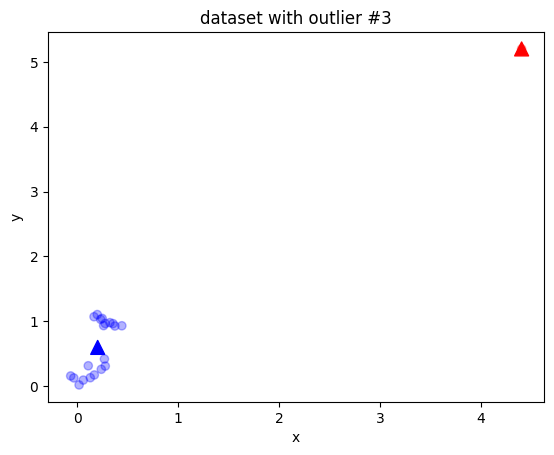

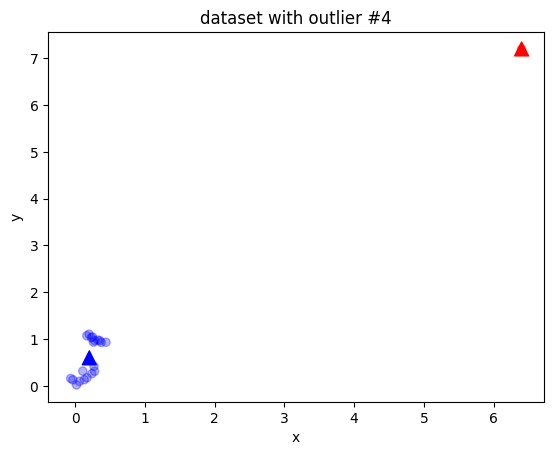

In [33]:
# we will now add iteratively a single outlier into the dataset.

outlier_list = [[0.4, 1.2], 
                [2.4, 3.2], 
                [4.4, 5.2],
                [6.4, 7.2]]

for i, outlier in enumerate(outlier_list):
    outlier_to_add = np.array(outlier).reshape((1, 2))
    X_with_outlier = np.vstack((X, outlier_to_add))
    
    kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=0)
    kmeans.fit(X_with_outlier)
    labels = kmeans.predict(X_with_outlier)
    centroids = kmeans.cluster_centers_

    # Let's plot the result!
    plt.figure(i+1)
    plt.title("dataset with outlier #%s" % (i+1))
    plt.scatter(X_with_outlier[:, 0], X_with_outlier[:, 1], c=labels, alpha=0.3, cmap="bwr")
    plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1], marker='^', s=100, cmap="bwr")
    plt.xlabel("x")
    plt.ylabel("y")

### Question to student: 
For a dataset with outliers, how will the size of the dataset affect the k-means performance?

### 1.1.3. x and y have very different units
Now we will examine the performance of k-means when the features (x and y in our case) have very different units. <br>
K-means uses the Euclidean metric in its cost function. What will happen if the features have different dynamical ranges?

Text(0, 0.5, 'y')

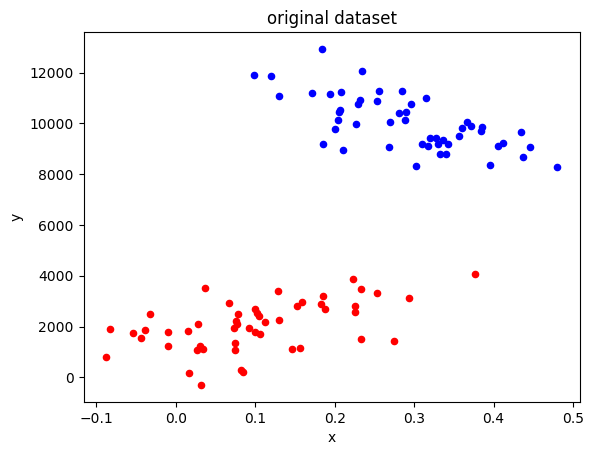

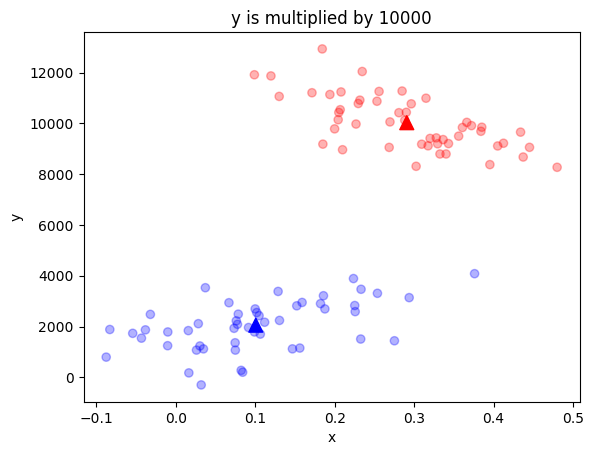

In [36]:
# first test - we will multiply y by 10000

size = 50
y_factor = 10000

mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T
mean_2 = np.array([0.3, 1.0])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

x = np.concatenate((x1, x2))
y = np.concatenate((y1*y_factor, y2*y_factor))
X = np.array([x, y]).T


kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Let's plot the result!
plt.figure(1)
plt.title("original dataset")
plt.scatter(x1, y1*y_factor, c="r", s=20)
plt.scatter(x2, y2*y_factor, c="b", s=20)
plt.xlabel("x")
plt.ylabel("y")


plt.figure(2)
plt.title("y is multiplied by 10000")
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.3, cmap="bwr")
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1], marker='^', s=100, cmap="bwr")
plt.xlabel("x")
plt.ylabel("y")


Text(0, 0.5, 'log y')

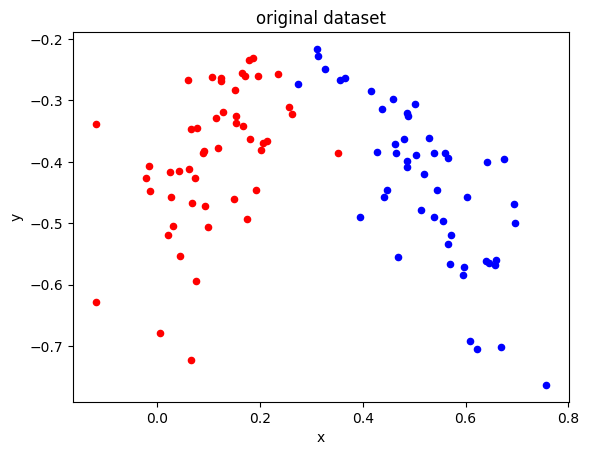

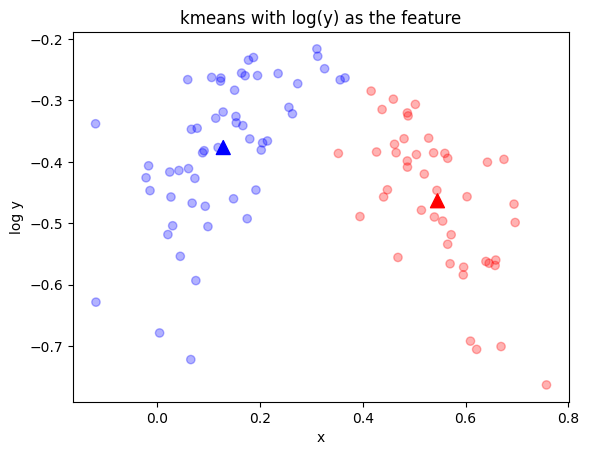

In [37]:
# second test: y has a different dynamical range. We will take log(y) as our feature.

size = 50

mean_1 = np.array([0.1, 0.4])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T
mean_2 = np.array([0.5, 0.4])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

x = np.concatenate((x1, x2))
y = np.concatenate((numpy.log10(y1), numpy.log10(y2)))
X = np.array([x, y]).T


kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Let's plot the result!
plt.figure(1)
plt.title("original dataset")
plt.scatter(x1, numpy.log10(y1), c="r", s=20)
plt.scatter(x2, numpy.log10(y2), c="b", s=20)
plt.xlabel("x")
plt.ylabel("y")


plt.figure(2)
plt.title("kmeans with log(y) as the feature")
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.3, cmap="bwr")
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1], marker='^', s=100, cmap="bwr")
plt.xlabel("x")
plt.ylabel("log y")

Text(0, 0.5, '10**y')

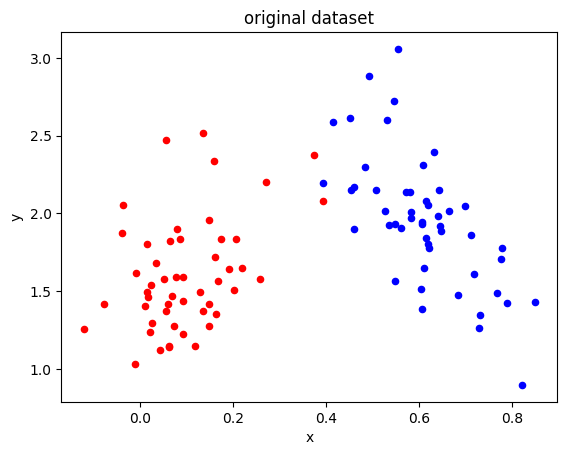

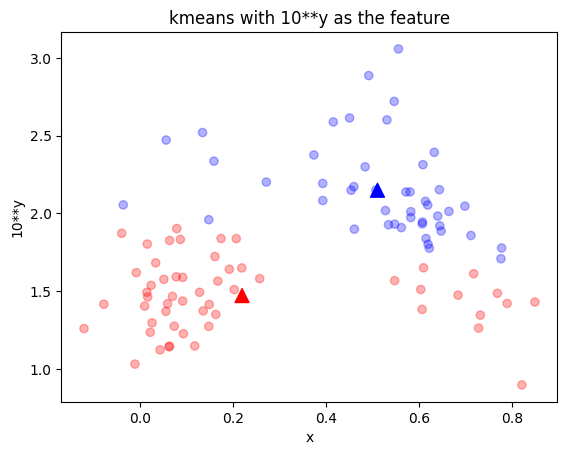

In [38]:
# third test: y has a different dynamical range. We will take 10**y as our feature.

size = 50

mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T
mean_2 = np.array([0.6, 0.3])
cov_2 = np.array([[0.01, -0.007], [-0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

x = np.concatenate((x1, x2))
y = np.concatenate((10**y1, 10**y2))
X = np.array([x, y]).T


kmeans = KMeans(n_clusters=2, init='random', n_init=1, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

# Let's plot the result!
plt.figure(1)
plt.title("original dataset")
plt.scatter(x1, 10**y1, c="r", s=20)
plt.scatter(x2, 10**y2, c="b", s=20)
plt.xlabel("x")
plt.ylabel("y")
#plt.savefig("/Users/dalyabaron/Downloads/fig_tmp0.pdf")

plt.figure(2)
plt.title("kmeans with 10**y as the feature")
plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.3, cmap="bwr")
plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1], marker='^', s=100, cmap="bwr")
plt.xlabel("x")
plt.ylabel("10**y")
#plt.savefig("/Users/dalyabaron/Downloads/fig_tmp1.pdf")

### Question to student: 
Try to think about additional data representations that can change the output of k-means.

## 1.2. K-means performance for different hyper-parameters
Here we will examine the output of K-means for different hyper-parameters. <br>
The hyper-parameters that we will consider: <br>
1.2.1. The number of clusters, k. <br>
1.2.2. The initial placement of the cluster centroids. <br>
We will check whether these can be optimized using the cost function of k-means.

### 1.2.1 K-means performance as a function of the number of clusters
Here we will examine the performace of K-means for a given dataset, but for different number of clusters, k. 
We will ask whether the cost function can help us find the correct number of clusters (Elbow Method).

Text(0, 0.5, 'y')

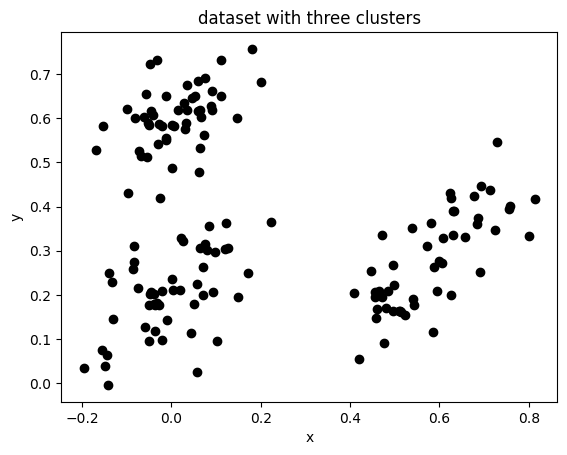

In [39]:
# for this example we will simulate three clusters 

mean_1 = np.array([0.0, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T

mean_2 = np.array([0.6, 0.3])
cov_2 = np.array([[0.01, 0.007], [0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

mean_3 = np.array([0., 0.6])
cov_3 = np.array([[0.007, 0.003], [0.003, 0.007]])
x3, y3 = np.random.multivariate_normal(mean_3, cov_3, size=size).T


x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))
X = np.array([x, y]).T

plt.title("dataset with three clusters")
plt.scatter(X[:, 0], X[:, 1], c="k")
plt.xlabel("x")
plt.ylabel("y")

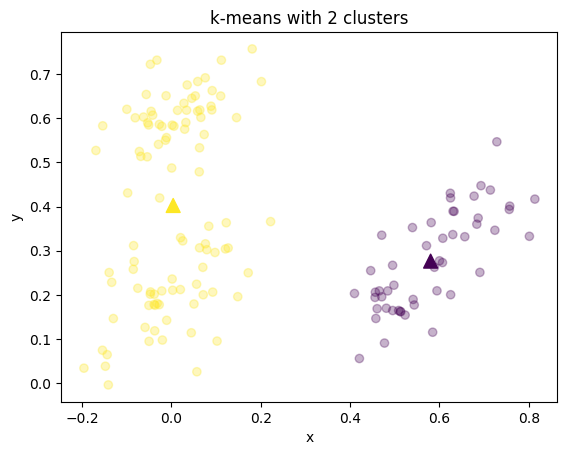

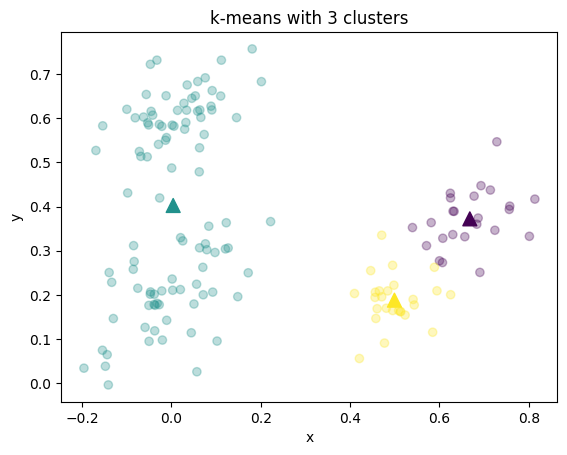

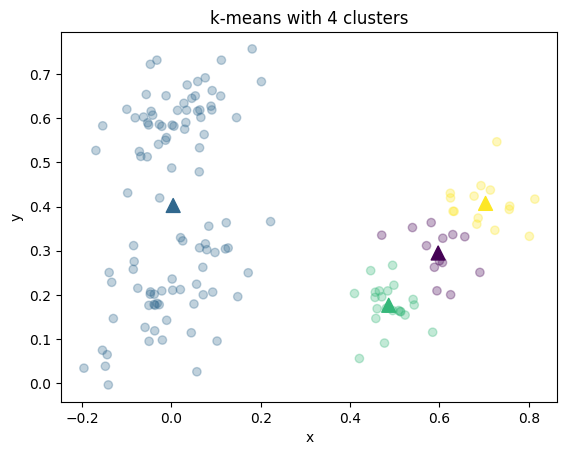

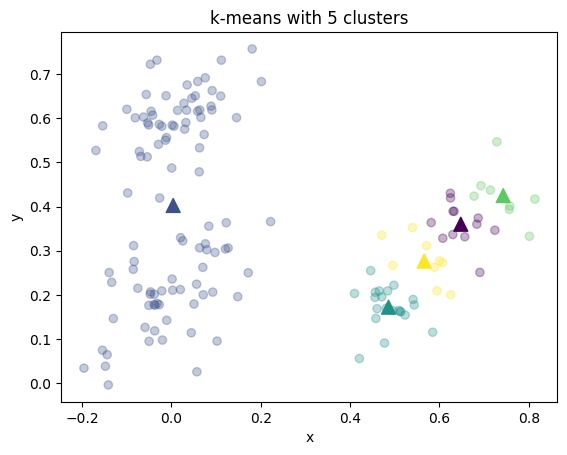

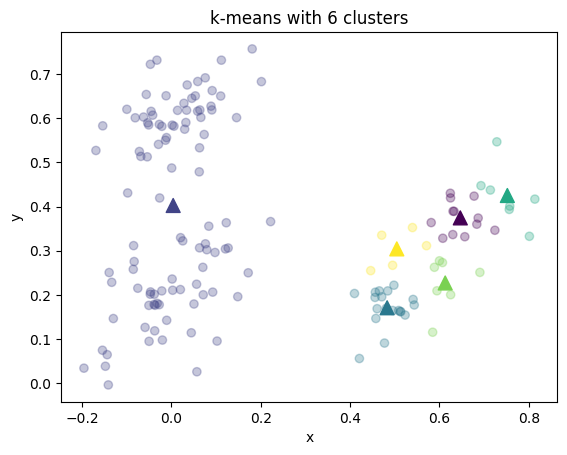

In [43]:
# let's iterate over different k values, plot the result, and save the minimized cost function.

k_values = np.arange(2, 7)

minimal_cost_function = []

for i, k_val in enumerate(k_values):
    kmeans = KMeans(n_clusters=k_val, init='random', n_init=1, random_state=0)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    minimal_cost_function.append(kmeans.inertia_)

    # Let's plot the result!
    plt.figure(i+1)
    plt.title("k-means with %s clusters" % k_val)
    plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.3, cmap="viridis")
    plt.scatter(centroids[:, 0], centroids[:, 1], c=numpy.arange(0,k_val), marker='^', s=100, cmap="viridis")
    plt.xlabel("x")
    plt.ylabel("y")


Text(0, 0.5, 'minimal cost function')

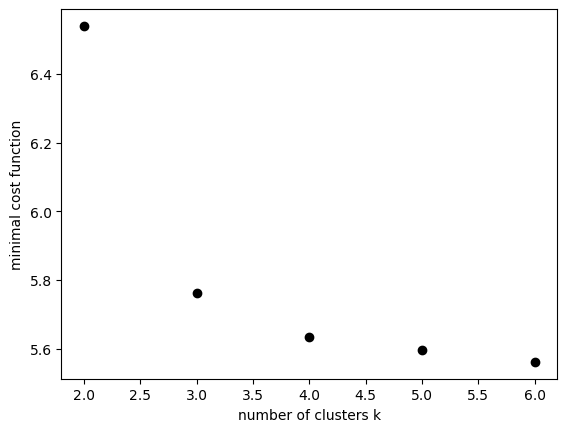

In [45]:
# let's plot the minimal cost function as a function of k (The "Elbow method" to decide which is the optimal number of clusters for this case)

plt.scatter(k_values, minimal_cost_function, c="k")
plt.xlabel("number of clusters k")
plt.ylabel("minimal cost function")

### Question to student:
Try to increase the number of simulated clusters and repeat the Elbow method. Does it work? <br>
Try to find a scenario in which the Elbow method fails.

### 1.2.2 K-means performance as a function of the initial placement of centroids
Here we will examine the performace of K-means when we change the initial placement of the centroids. <br>
The standard algorithm randomly selects the initial centroids from the set of examples. <br>
We will try to place them by hand, and see whether these affect the output. <br>
We will then examine whether the cost function can be used to find the best initial placement. <br>

Text(0, 0.5, 'y')

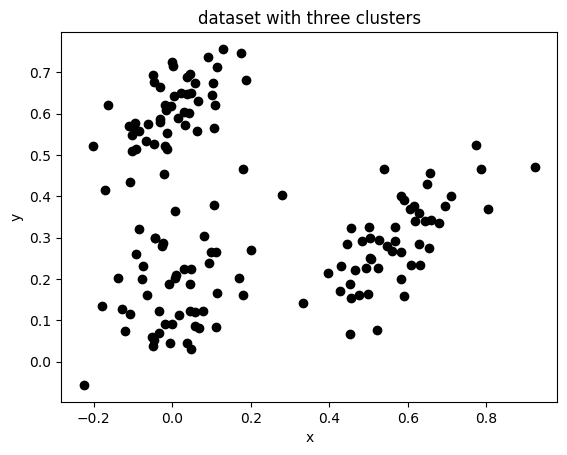

In [46]:
# we will continue with the dataset from the previous example, and use k=3.
mean_1 = np.array([0.0, 0.2])
cov_1 = np.array([[0.01, 0.005], [0.005, 0.01]])
x1, y1 = np.random.multivariate_normal(mean_1, cov_1, size=size).T

mean_2 = np.array([0.6, 0.3])
cov_2 = np.array([[0.01, 0.007], [0.007, 0.01]])
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, size=size).T

mean_3 = np.array([0., 0.6])
cov_3 = np.array([[0.007, 0.003], [0.003, 0.007]])
x3, y3 = np.random.multivariate_normal(mean_3, cov_3, size=size).T


x = np.concatenate((x1, x2, x3))
y = np.concatenate((y1, y2, y3))
X = np.array([x, y]).T

plt.title("dataset with three clusters")
plt.scatter(X[:, 0], X[:, 1], c="k")
plt.xlabel("x")
plt.ylabel("y")

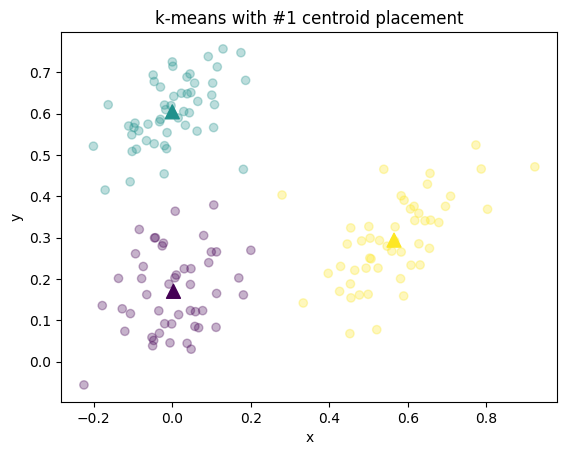

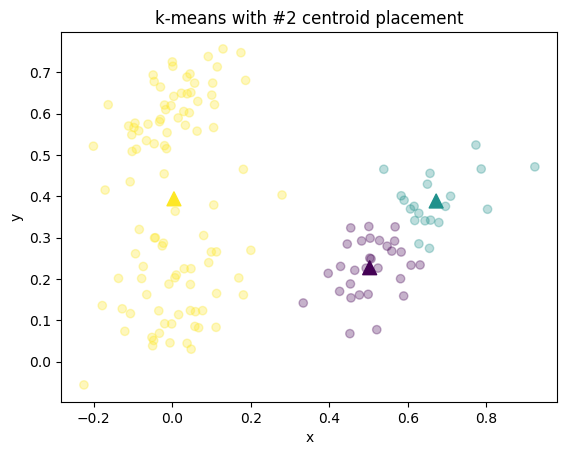

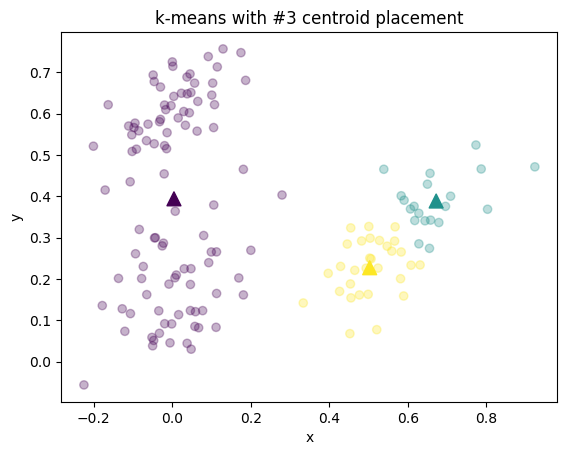

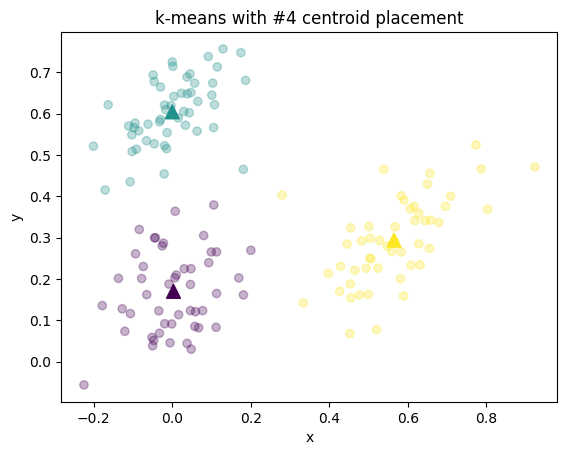

In [47]:
# we will set the location of the initial centroids by hand. 

centroid_list = [[[0, 0], [0, 0.1], [0, 0.2]],
                 [[0.6, 0.3], [0.8, 0.4], [0, 0.2]],
                 [[0.4, 0.1], [0.9, 0.8], [0.6, 0.3]],
                 [[0, 0], [0, 0.6], [0.6, 0.2]]]

minimal_cost_function = []
for i, centroid in enumerate(centroid_list):
    centroid_arr = np.array(centroid)
    kmeans = KMeans(n_clusters=3, init=centroid_arr, n_init=1, random_state=0)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    minimal_cost_function.append(kmeans.inertia_)

    # Let's plot the result!
    plt.figure(i+1)
    plt.title("k-means with #%s centroid placement" % (i + 1))
    plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.3, cmap="viridis")
    plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1,2], marker='^', s=100, cmap="viridis")
    plt.xlabel("x")
    plt.ylabel("y")

In [48]:
# print the minimal cost function. Can you use this to find the "best" centroid placement?

print(minimal_cost_function)

[2.8353763350473735, 6.83035369566319, 6.83035369566319, 2.8353763350473735]


### Note to student: 
In K-means, the cost function can be used to find the initial placement of centroids (for a given number of clusters!). <br>
**Sklearn** implemeneted such a process. The algorithm randomly selects the initial centroid location several times. In each iteration, the cost function is computed, and the minimal cost function is saved. The algorithm returns the output of the iteration with the lowest cost function reached. The number of such iterations is given by the input parameter **n_init**.

# 2. Hierarchal Clustering
Here we will explore Hierarchical Clustering on various datasets, specifically, we will examine the agglomerative approach (recursively merging a set of smaller clusters).<br>
We will use **scipy** implementation of Hierarchical Clustering: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html <br>
Contrary to the K-means case, the notebook contains examples of different applications of Hierarchical Clustering, and you are required to break the algorithm by yourself! <br>
The examples in the notebook: <br>
2.1. Simple two cluster dataset: we will see how to produce a dendrogram and how this can be used to determine the number of clusters. We will examine different linkage methods.<br>
2.2. More complicated cluster dataset.<br>
2.3. A dataset without clear clusters.<br>
2.4. Visualization of a distance matrix. <br><br>

Also, see very nice tutorial: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

## 2.1. Simple two cluster dataset
In this first example, we will use a simple two cluster dataset, similar to the K-means case. <br>
We will learn how to produce dendrograms, and how to produce the finak clusters.

(50, 2) (50, 2) (100, 2)


Text(0, 0.5, 'y')

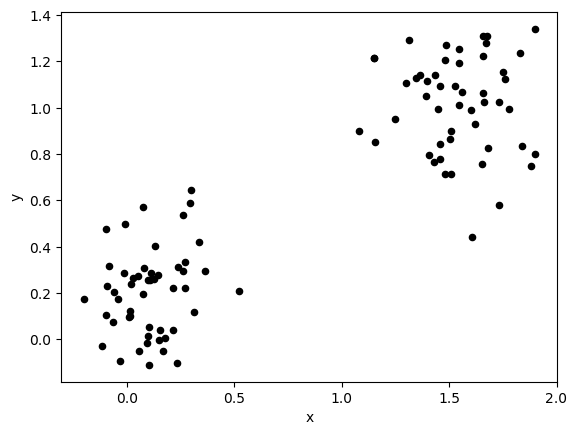

In [51]:
# start by simulating a simple dataset with 2 dimensions, where the output is expected

# we will simulate a dataset with 2 clusters, each is drawn from a 2D Gaussian distribution
size = 50
mean_1 = np.array([0.1, 0.2])
cov_1 = np.array([[0.03, 0.001], [0.001, 0.03]])
cluster_1 = np.random.multivariate_normal(mean_1, cov_1, size=size)

mean_2 = np.array([1.5, 1.0])
cov_2 = np.array([[0.04, 0.002], [0.002, 0.04]])
cluster_2 = np.random.multivariate_normal(mean_2, cov_2, size=size)

X = np.concatenate([cluster_1, cluster_2])
print(cluster_1.shape, cluster_2.shape, X.shape)

plt.scatter(X[:, 0], X[:, 1], c="k", s=20)
plt.xlabel("x")
plt.ylabel("y")

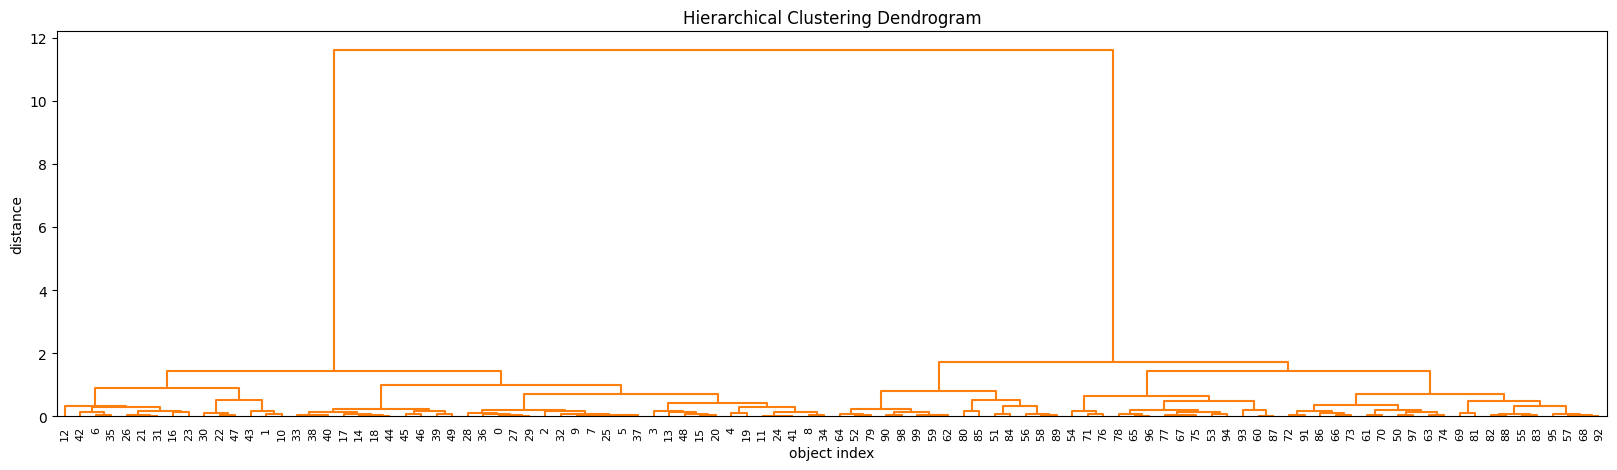

In [52]:
# we will start with a simple examine with the 'ward' linkage method, and an Euclidean metric.

Z = linkage(X, 'ward') # Z contains the merge history

# we will now plot the dendrogram
plt.figure(figsize=(20, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('object index')
plt.ylabel('distance')
tmp = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=20, # distance beyond which we define a cluster. 
)

### Dendrogram: 
We can see that the data is naturally splitted into two clusters: there are two separate branches in the dendrogram, each of them has a maximal distance of about 2. The two branches are merged with a distance of 12, clearly indicating that our data contains two separate clusters.

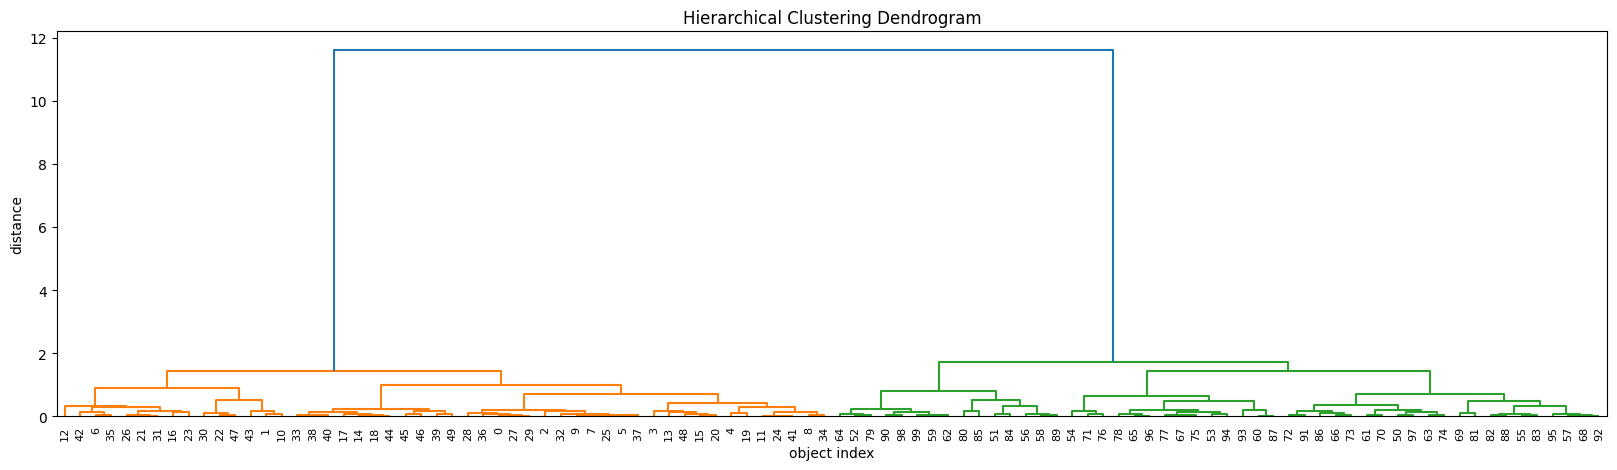

In [53]:
# we will now use the color_threshold to color the clusters with different colors
plt.figure(figsize=(20, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('object index')
plt.ylabel('distance')
tmp = dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=3, # distance beyond which we define a cluster. 
)

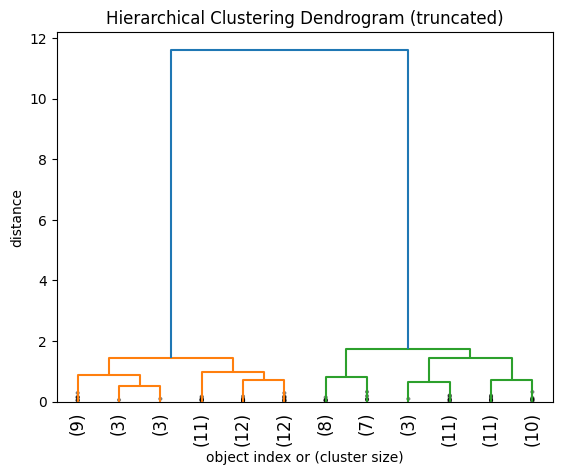

In [54]:
# for large datasets, we might want to truncate the dendrogram and plot only the p last mergers.
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('object index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

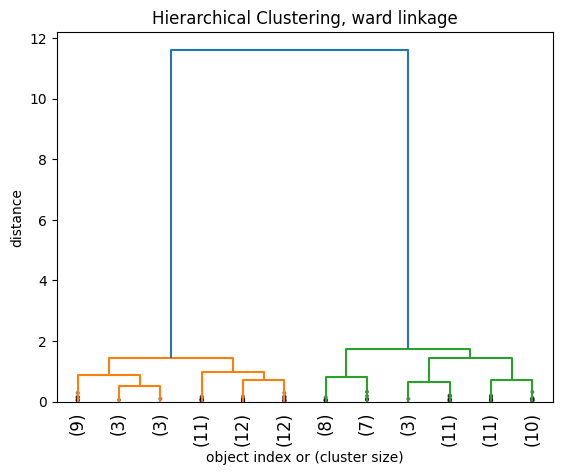

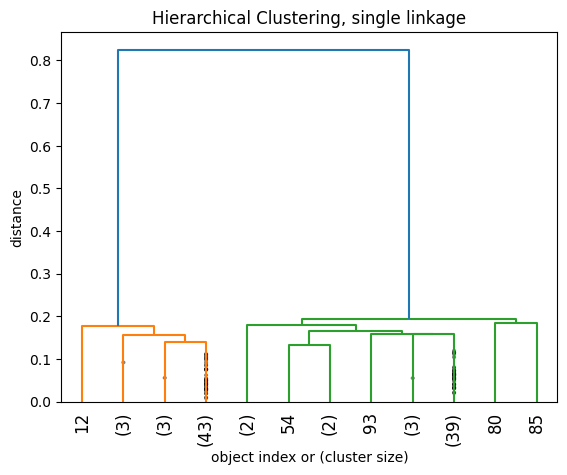

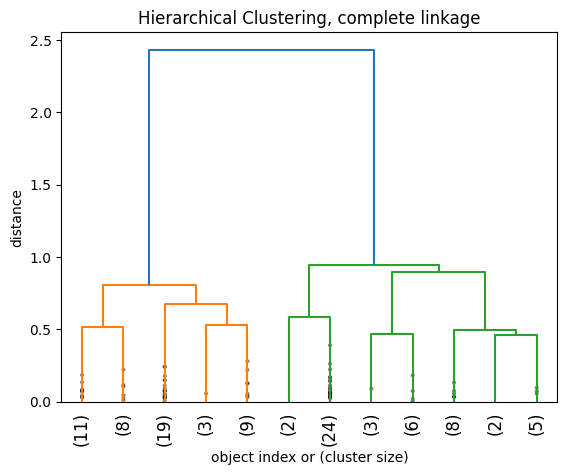

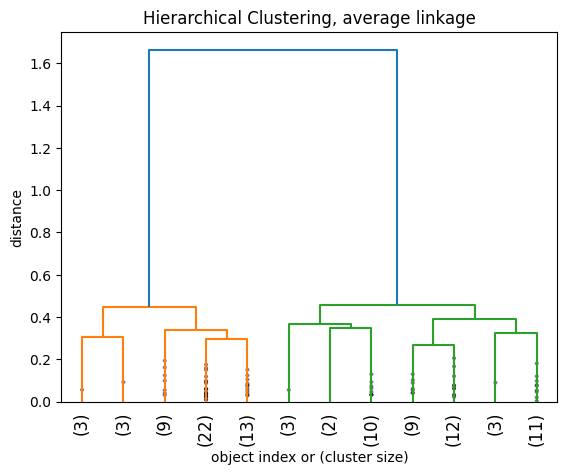

In [55]:
# let us now explore different linkage methods. Does the result change?
# see https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage for more details
linkage_methods = ['ward', 'single', 'complete', 'average']

for i, link_method in enumerate(linkage_methods):
    Z = linkage(X, link_method)
    plt.figure(i + 1)
    plt.title('Hierarchical Clustering, %s linkage' % link_method)
    plt.xlabel('object index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=12,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.show()

Text(0, 0.5, 'y')

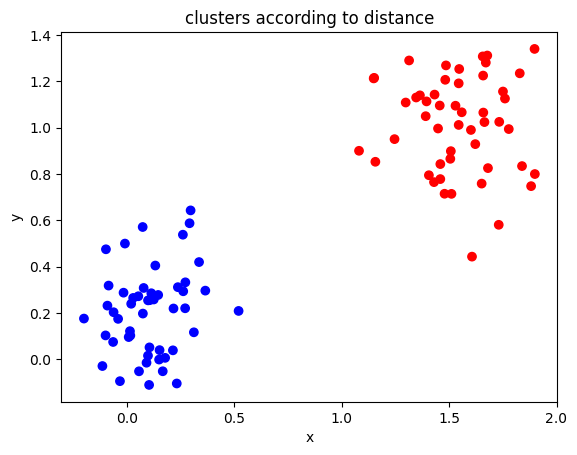

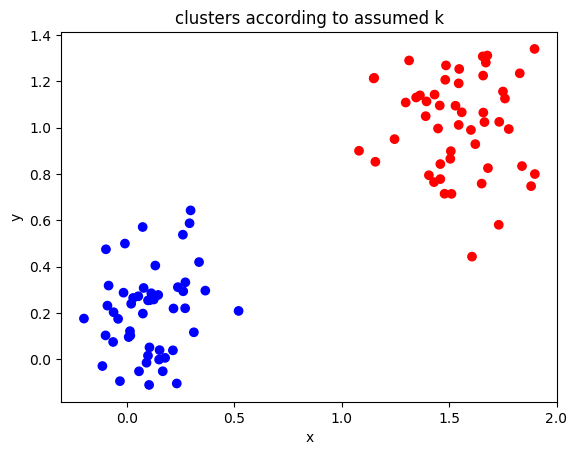

In [57]:
# finally, let's extract the clusters and plot them in the feature space
# there are two main methods to extract the clusters: 
# (1) We can extract clusters according to the maximal distance 
# (2) If we know the number of clusters (from the dendrogram), we can extract clusters according to k

Z = linkage(X, 'ward')

# first method
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
plt.figure(1)
plt.title("clusters according to distance")
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='bwr')
plt.xlabel("x")
plt.ylabel("y")

# second method
k=2
clusters = fcluster(Z, k, criterion='maxclust')
plt.figure(2)
plt.title("clusters according to assumed k")
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='bwr')
plt.xlabel("x")
plt.ylabel("y")

## 2.2. More complicated two cluster dataset
In this second example, we will produce a more complicated dataset, with two clear clusters. <br>
We will examine the dendrogram and the resulting clusters. <br>

Text(0, 0.5, 'y')

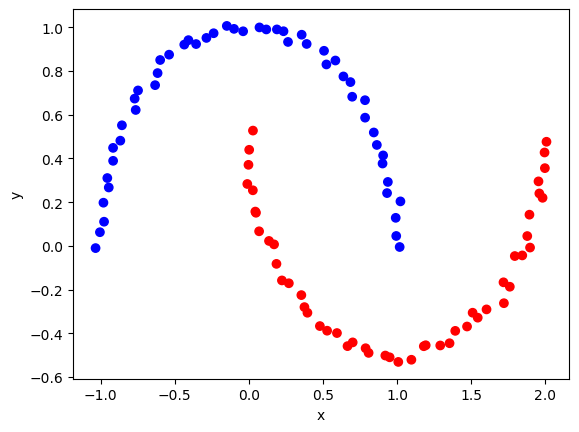

In [58]:
# dataset from: http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
from sklearn.datasets import make_moons
size = 100
X, y = make_moons(n_samples=size, noise=0.02)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")
plt.xlabel("x")
plt.ylabel("y")

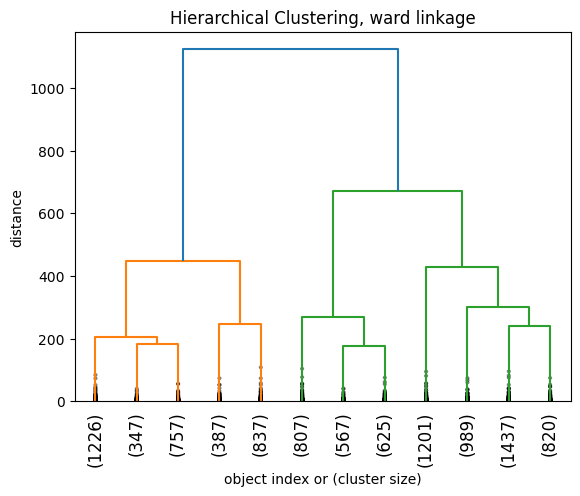

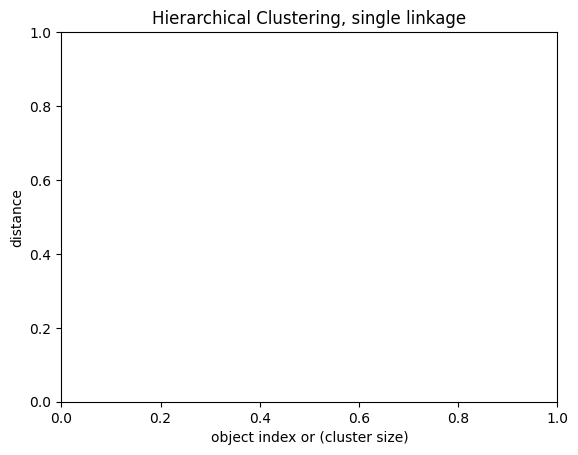

<class 'RecursionError'>: maximum recursion depth exceeded

In [70]:
# let's examine the dendrogram with different linakge methods

linkage_methods = ['ward', 'single', 'complete', 'average']

for i, link_method in enumerate(linkage_methods):
    Z = linkage(X, link_method)
    plt.figure(i + 1)
    plt.title('Hierarchical Clustering, %s linkage' % link_method)
    plt.xlabel('object index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Z,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=12,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.show()

### Questions to student:
(1) For this dataset, which contains rather elongated clusters, but with a constant density of objects in a unit volume, is there a preferred linkage method? <br>
(2) Judging by the dendrograms alone, is there a preffered linkage method? why?

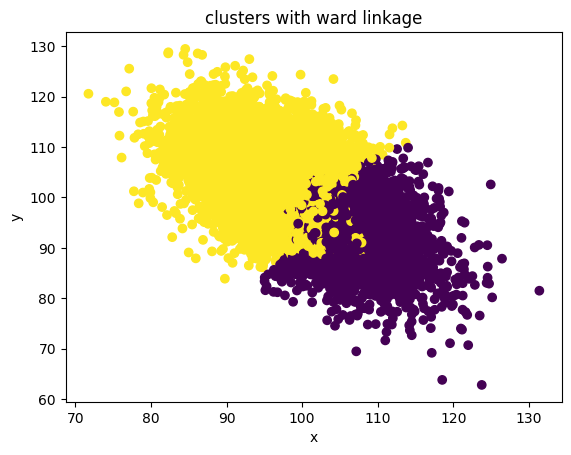

<Figure size 640x480 with 0 Axes>

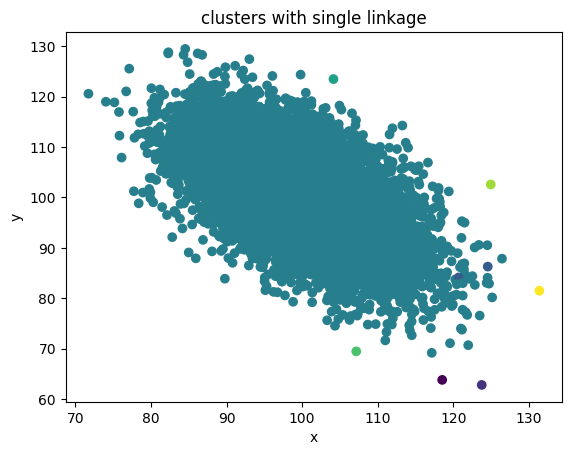

<Figure size 640x480 with 0 Axes>

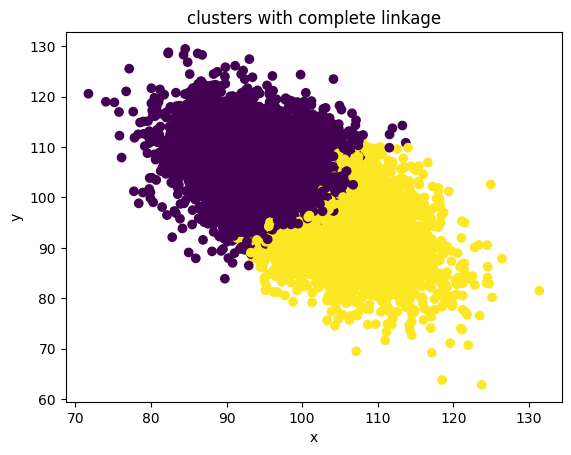

<Figure size 640x480 with 0 Axes>

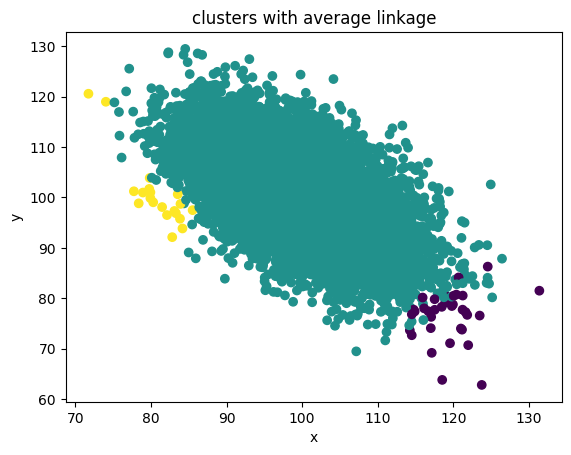

In [71]:
# we will use all different linkage methods and plot the resulting clusters
# we will use the default distance definition by scipy, which defines clusters below a distance of 70% for the maximal distance.

linkage_methods = ['ward', 'single', 'complete', 'average']

for i, link_method in enumerate(linkage_methods):
    Z = linkage(X, link_method)
    max_distance = Z[-1, 2] # if you do not understand this line, call me!
    
    plt.figure(i + 1)
    max_d = max_distance * 0.7
    clusters = fcluster(Z, max_d, criterion='distance')
    plt.figure(1)
    plt.title("clusters with %s linkage" % link_method)
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

## 2.3. A dataset without clear clusters
We will now examine a dataset that does not have clear clusters in it. <br>
Specifically, we are interested to see whether the dendrogram can help us uncderstand the structure within the dataset!

Text(0, 0.5, 'y')

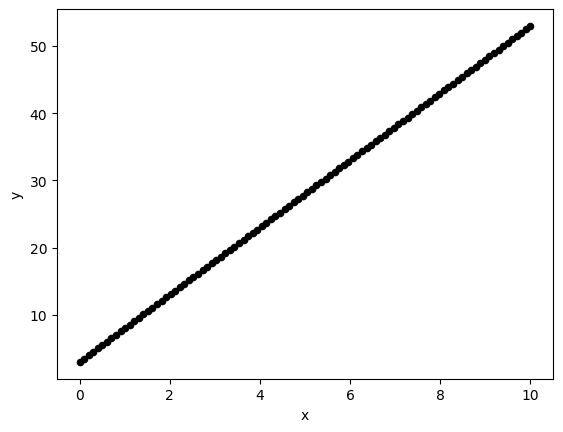

In [72]:
# we will simulate a dataset that shows a correlation between x and y (some sort of a sequence)
# we will start with a case without any noise, and then we will add noise to the dataset
size = 100
x = np.linspace(0, 10, size)
y = (5 * x + 3) + np.random.normal(loc=0.0, scale=0.0, size=size) 
X = np.array((x, y)).T

plt.scatter(X[:, 0], X[:, 1], c="k", s=20)
plt.xlabel("x")
plt.ylabel("y")

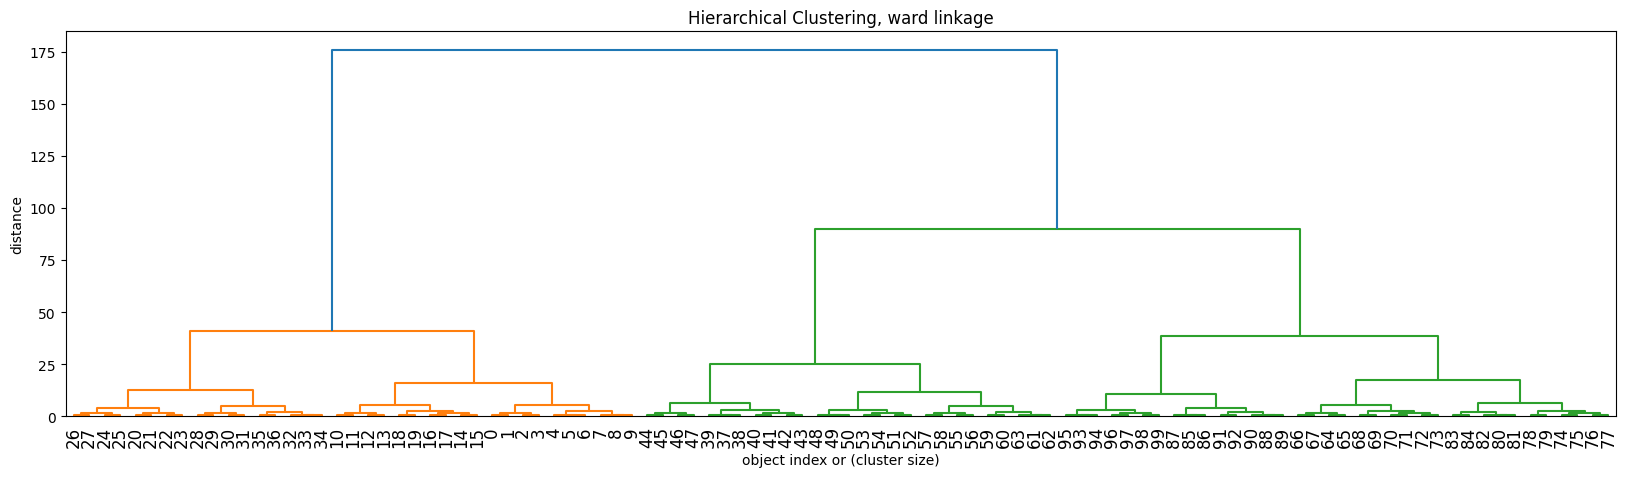

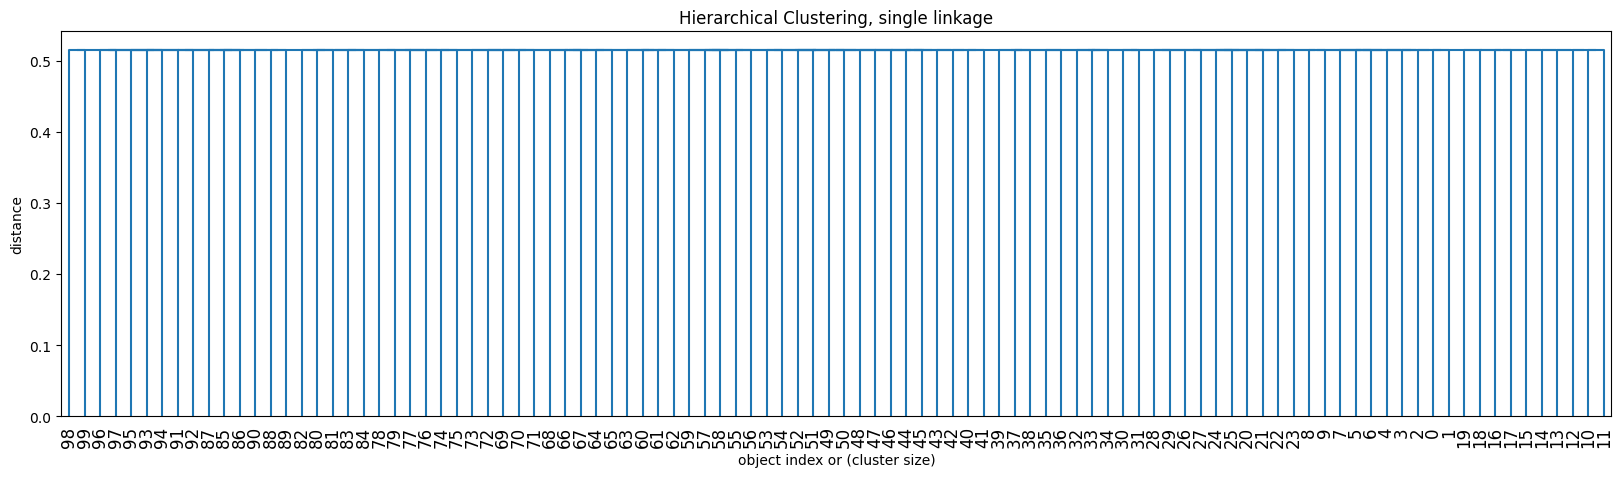

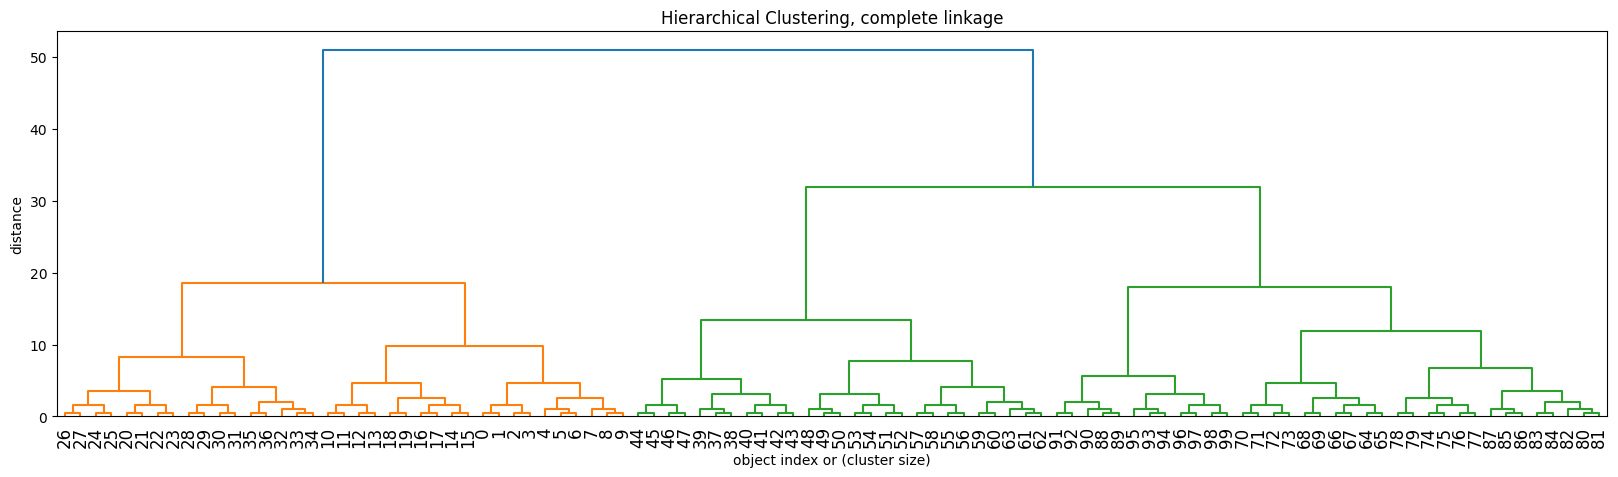

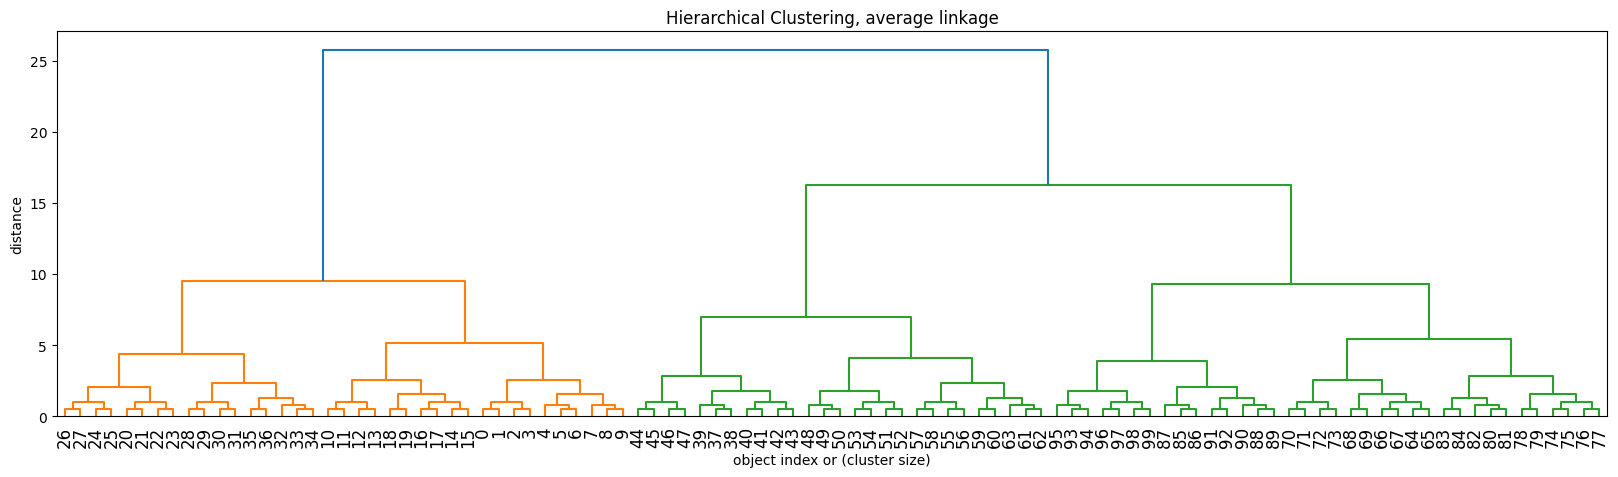

In [73]:
# let's examine the dendrogram of this dataset, for different likage methods. 
# this time we will not contruct the dendrogram, so we can examine its structure

linkage_methods = ['ward', 'single', 'complete', 'average']

for i, link_method in enumerate(linkage_methods):
    Z = linkage(X, link_method)
    plt.figure(i+1, figsize=(20, 5))
    plt.title('Hierarchical Clustering, %s linkage' % link_method)
    plt.xlabel('object index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=12.,
    )
    plt.show()

### Question to student:
What can we learn from these dendrograms? Which linkage method should we use to identify whether we have clusters in our dataset?<br>
For each of the linkage methods, plot the distance of each merge. What do you find?

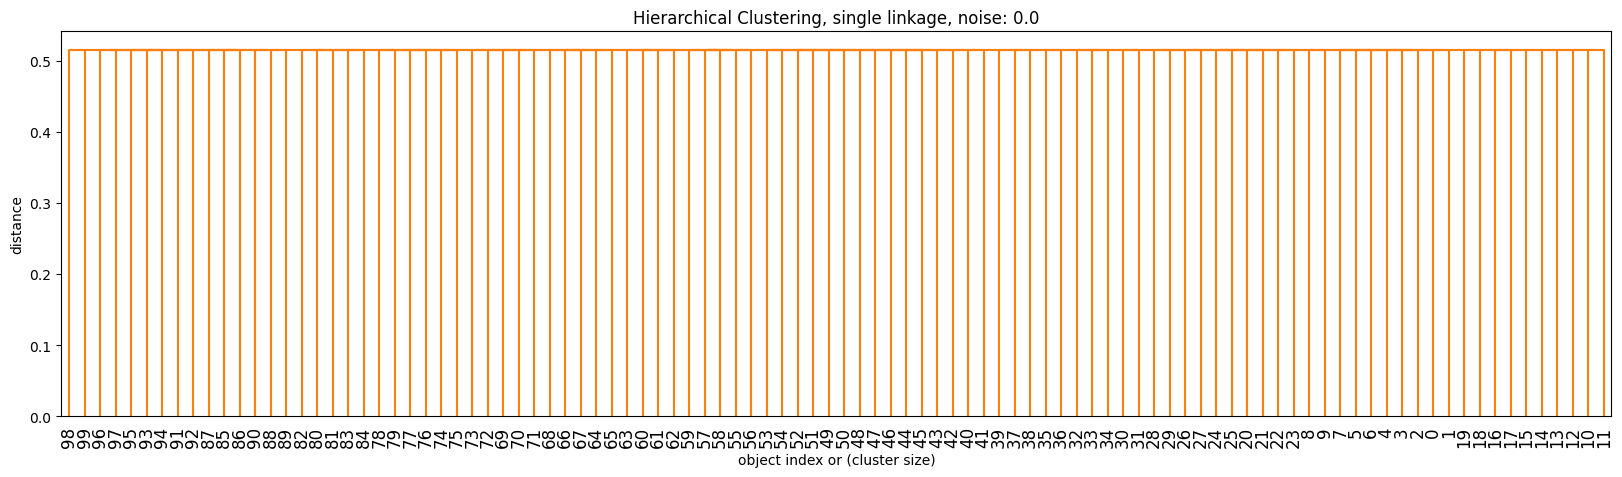

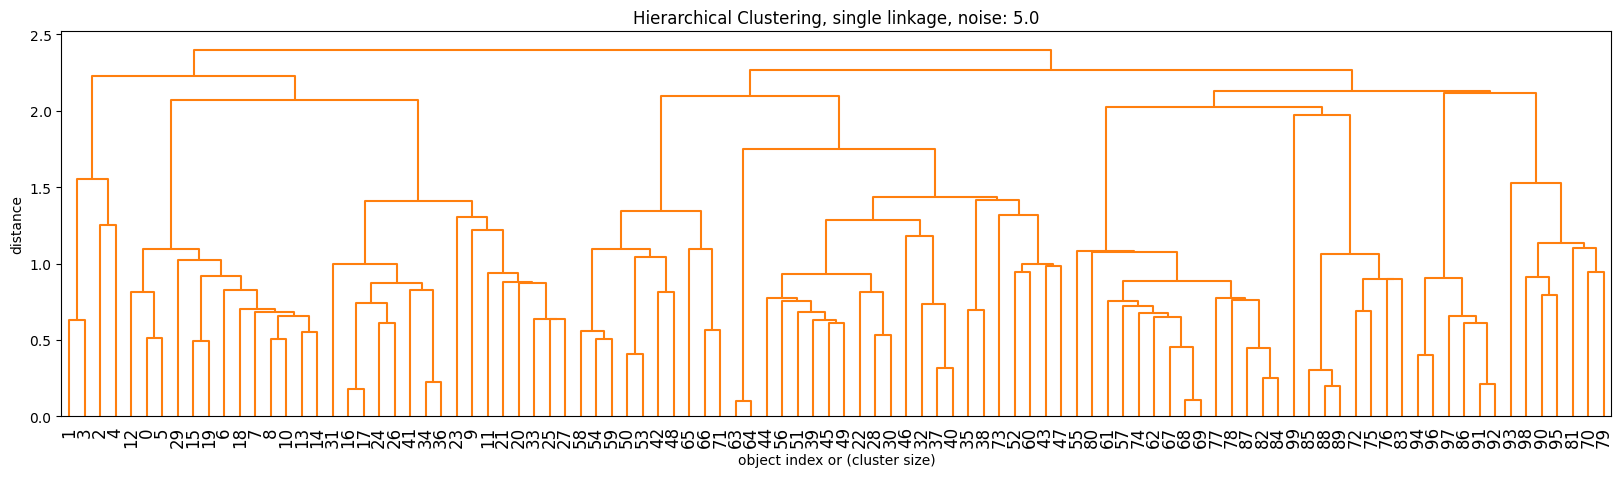

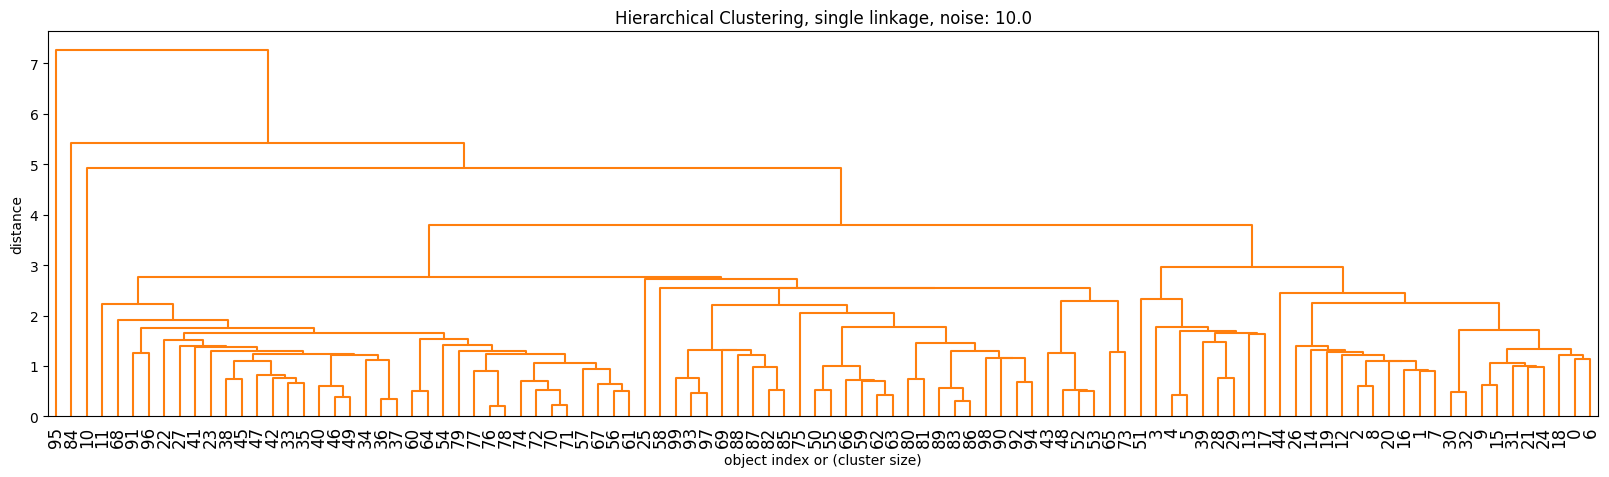

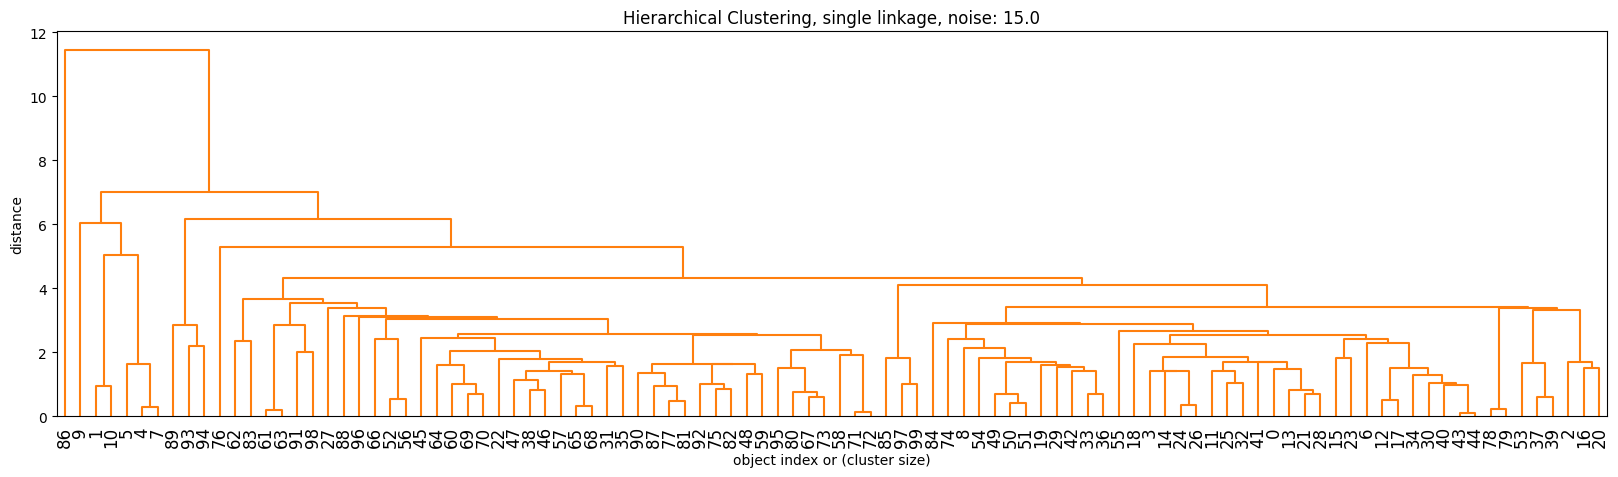

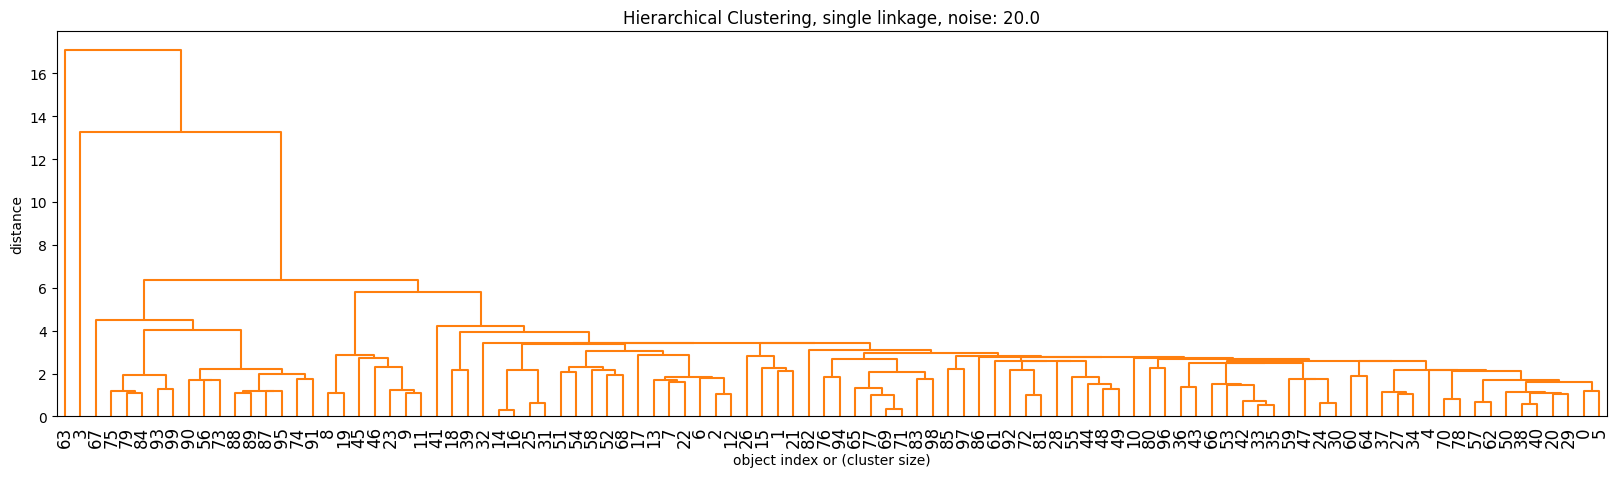

In [74]:
# we will now focus on the 'single' linkage method, and examine the resulting dendrogram for different noise amplitudes
noise_std_list = [0.0, 5.0, 10.0, 15.0, 20.0]
size = 100
x = np.linspace(0, 10, size)

for i, noise_std in enumerate(noise_std_list):
    y = (5 * x + 3) + np.random.normal(loc=0.0, scale=noise_std, size=size) 
    X = np.array((x, y)).T

    Z = linkage(X, 'single')
    plt.figure(i+1, figsize=(20, 5))
    plt.title('Hierarchical Clustering, single linkage, noise: %s' % noise_std)
    plt.xlabel('object index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=12.,
        color_threshold=max(Z[:,2]) + 1,
    )
    plt.show()

### Question to student:
Try different datasets where there are no clear clusters. Can you use the dendrograms to learn something about your dataset?

3. Applications to real Gaia data
### Now, we are ready to start applying our knowledge to real astronomical data from the Gaia mission:
Go to ESASky: https://sky.esa.int/esasky/?target=65.49763375%2019.535116666666667&hips=DSS2+color&fov=0.09995798318262607&cooframe=J2000&sci=true&lang=en

ESASky contains all the data of all the space missions supported by the Europan Space Agency, freely accessible in a visual way.

Before starting the real work, feel free to click on "Explorer" and explore at the Universe. On the top left there is an icon with a dice that will show you random beautiful things of our skies.

In both modes (Science and Explorer), the lefmost icon on the top left will allow you to change the view from optical to other wavelenghts, if you want to see space through the eyes of different telescopes.

### Once you are done exploring, please select your favourite region of the sky and download all Gaia sources in it (clicking on top lef "Explore catalogue data for this region" and then click Gaia DR3).

Beware of the amount of data so you download a reasonable file size, some areas are very crowded!

You can choose the format in which to donwload your data, I recommend csv. Once you have that portion of the sky downloaded, you can open the file and you will notice there are many columns. Gaia has a lot of information to play with!

In this workshop, we will focus only in those called: "ra", "dec", "parallax", "pmra", "pmdec".

"ra" and "dec" are the two coordinates of where stars are in the sky (this is, the x and y of above examples). "parallax" gives the information about how far stars are (this is, the third dimension). "pmra" and "pmdec" describe the velocities of the stars in the sky.

Try now applying what you know about clustering algorithms to this dataset. Start with "ra" and "dec". How many clusters do you find in this region of the sky? 

Then, you could also add a third dimension, the distance or parallax, to also select clusters of stars based on their distance to Earth. Finally, you can try to find clusters by adding the velocities "pmra" and "pmdec"

How many clusters do you find?

Have you considerid that the 5 parametes "ra", "dec", "parallax", "pmra", "pmdec" have different dynamical ranges? What about normalizing them and giving them the same standard deviation?

In principle, you should not find many clusters, as there are billions of stars in the Galaxy and only a few appear clustered, so you must have been very lucky to randomly select a true cluster!

It is possible that nevertheless you found many clusters, what does that make you think about blindy using clustering algorithms?

In ESASky, use the top right search icon to look for "Pleiades" and/or "Hyades". These are famous nearby clusters, you should be able to find this with your code (specially if you add the parallax or distance as a parameter)

Once you have optimized your unsurvised machine learning clustering function for Gaia data, I encourage you to keep exploring ESASky and look at what other data from other mission you might be interesting in. It is all there! (you can overlap images)